In [1]:
# Function to generate all rectangular Dyck paths for a given m x n rectangle
def rectangular_dyck_paths(m, n):
    if m == 0 and n == 0:
        return [[]]
    if m==0 and n>0:
        return [['R'] * n]
    if m>0 and n==0:
        return [['U'] * m]

    paths = []
    if m > 0:
        # Add a step in the vertical direction and recursively generate the rest of the path
        for path in rectangular_dyck_paths(m - 1, n):
            paths.append(['U'] + path)
    if n > 0 and m < n:
        # Add a step in the horizontal direction and recursively generate the rest of the path
        for path in rectangular_dyck_paths(m, n - 1):
            paths.append(['R'] + path)

    return paths


# Function to compute the area under a rectangular Dyck path
def path_area(path, m, n):
    area = 0
    vertical_steps = 0
    for step in path:
        if step == 'U':
            vertical_steps += 1
        elif step == 'R':
            area += vertical_steps
    
    return area-(m*n)/2

# Main function to compute average area under Dyck paths for a given rectangle size
def total_dyck_path_area(m, n):
    paths = rectangular_dyck_paths(m, n)
    total_area = 0
    for path in paths:
        total_area += path_area(path, m, n)
    
    return total_area

def average_dyck_path_area(m,n):
    paths = rectangular_dyck_paths(m, n)
    total_area = 0
    for path in paths:
        total_area += path_area(path, m, n)
    return total_area/len(paths)



In [ ]:
for n in range(1,8):
    for k in range(1, 8):
        

In [52]:
# Example usage for a 3x3 rectangl
print(rectangular_dyck_paths(2,4))

[['U', 'U', 'R', 'R', 'R', 'R'], ['U', 'R', 'U', 'R', 'R', 'R'], ['U', 'R', 'R', 'U', 'R', 'R'], ['U', 'R', 'R', 'R', 'U', 'R'], ['R', 'U', 'U', 'R', 'R', 'R'], ['R', 'U', 'R', 'U', 'R', 'R'], ['R', 'U', 'R', 'R', 'U', 'R'], ['R', 'R', 'U', 'U', 'R', 'R'], ['R', 'R', 'U', 'R', 'U', 'R']]


In [2]:
print(path_area(['U', 'U', 'R', 'R', 'R', 'R'],2,4))

4


In [40]:
from sage.combinat.dyck_word import DyckWords

# Function to display Dyck paths
def display_dyck_paths(size, count=3):
    # Get Dyck words of the specified size
    dyck_words = DyckWords(size)
    
    # Iterate over the first few Dyck words and plot them
    for dyck_word in dyck_words[:count]:
        dyck_word.pretty_print()

# Example usage for Dyck paths of size 3
display_dyck_paths(3)


     _
   _| 
 _|  .
|  . .

   ___
  | x 
 _|  .
|  . .

     _
 ___| 
| x  .
|  . .



In [4]:
areas = []
for n in range(6):
    t = total_dyck_path_area(n,n)
    areas.append(t)
    print(t)

0
1/2
3
29/2
65
281


In [43]:
fricas.guess('[1,2,3,5]')

[]

In [5]:
def Y(n,s):
    sum = 0
    for k in range(n+1):
        sum += binomial(s*k,k) * binomial(s*(n-k), n-k)
    return sum

def T(n,s):
    return binomial(s*n,n) / ((s-1)*n+1)

def A(n,s):
    return Y(n+1,s) / 2 - ((2*s - 3)*n +2*s -2) * T(n+1,s) / 2

In [9]:
for n in range(5):
    print(f'{A(n,3)} vs. {explicit_total(n)+4^n}')

1 vs. 1
9 vs. 5
69 vs. 22
502 vs. 93
3564 vs. 386


In [6]:
def explicit_total(n):
    return 4^n - binomial(2*n+1,n)

In [ ]:
for n in range(5):
    print(f'{binomial(2*n+2, n+1)} vs. {binomial(2*n+1,n)}')

In [7]:
def asymp(n, a):
    expr = n^(3/2) * sqrt(2*pi*a*(a+1))/4
    return N(expr.subs({n: n, a: a}))

In [28]:
for n in range(8):
    print(f'{4*N(average_dyck_path_area(n,2*n))} vs {asymp(n,2)}')

0.000000000000000 vs 0.000000000000000
2.00000000000000 vs 1.53499006191973
5.33333333333333 vs 4.34160752734961
9.33333333333333 vs 7.97604232907482
13.7454545454545 vs 12.2799204953579
18.4395604395604 vs 17.1617106161957
23.3389355742297 vs 22.5596544716790
28.3942208462332 vs 28.4284137815667


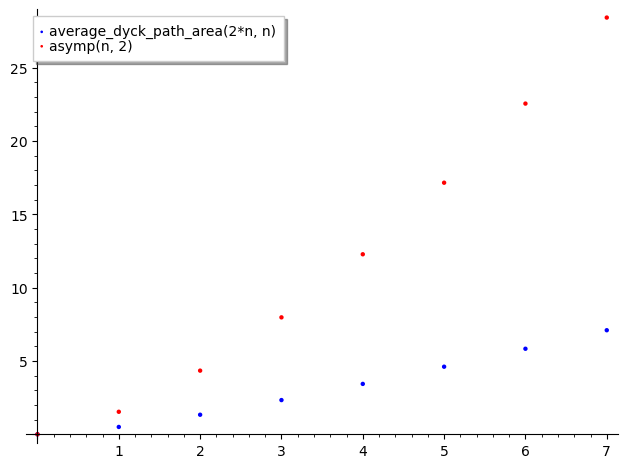

In [8]:
# Create a list of points to plot
points = [(n, N(average_dyck_path_area(n, 2*n))) for n in range(8)]  # Calculate points for average_dyck_path_area
points2 = [(n, N(asymp(n, 2))) for n in range(8)]  # Calculate points for asymp

# Plot the points
p1 = list_plot(points, color='blue', legend_label='average_dyck_path_area(2*n, n)')
p2 = list_plot(points2, color='red', legend_label='asymp(n, 2)')
show(p1 + p2)

In [1]:
# Define the variables
var('k n s')

# Define the function F_{s+1}(n)
def F(s, n):
    return 1/((s+1)*n + 1) * binomial((s+1)*n + 1, n)

# Define the sum expression with the F function included
sum_expression = sum(k * F(s, k) / (n + 1 - k) * binomial((s+1)*(n + 1 - k) - 2, n - k), k, 0, n)

# Display the sum expression
show(sum_expression)


sum(-k*binomial(-(k - n - 1)*s - k + n - 1, -k + n)*binomial(k*s + k + 1, k)/(k^2 - (k + 1)*n + (k^2 - k*n - k)*s - 1), k, 0, n)

In [1]:
# Define the variables
var('n s x')

# Define the nth term of the sequence
r_n = 1/(n+1) * binomial((s+1)*(n+1)-2, n)

# Find the generating function for the sequence
R = sum(r_n * x^n for n in range(20))  # compute the first 20 terms for the example

# Try to find a pattern or closed-form of the generating function
# Note: This is an experimental approach since there might not be a straightforward closed-form
# You may also use the guess() function from Sage, or other pattern recognition methods

show(R)


x^19*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^18*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^17*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^16*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^15*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^14*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^13*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^12*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^11*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^10*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^9*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^8*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^7*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^6*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^5*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^4*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^3*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^2*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + binomial((n + 1)*(s + 1) - 2, n)/(n + 1)

In [2]:
from sage.combinat.guess import find_genfunc

# Define the variables
var('n s x')

# Define the nth term of the sequence
r_n = lambda n: 1/(optionally) extra files to make your life easier, such as a start/stop script(n+1) * binomial((s+1)*(n+1)-2, n)

# Generate a list of the first few terms of the sequence
terms = [r_n(n) for n in range(1, 50)]  # Adjust the range as necessary

# Use the find_genfunc function to guess a generating function
R_guess = find_genfunc(terms, x)

# Show the guessed generating function
show(R_guess)

ModuleNotFoundError: No module named 'sage.combinat.guess'

In [4]:
# Define the necessary variables and functions in SageMath (Python syntax)

s = 9



def sequence_term(n):
    return 1/(n+1) * binomial((s+1)*(n+1)-2, n)



# Compute the first few terms of the sequence

sequence_values = [sequence_term(n) for n in range(10)]  # For n = 0 to 9

sequence_values

[1, 9, 126, 2109, 38916, 763686, 15636192, 330237765, 7141879503, 157366449604]

In [6]:

s = 9



def new_sequence_term(n):

    return s/((s+1)*n+s) * binomial((s+1)*n+s, n)



# Compute the first few terms of the sequence

sequence_values = [new_sequence_term(n) for n in range(10)]  # For n = 0 to 9

sequence_values

[1, 9, 126, 2109, 38916, 763686, 15636192, 330237765, 7141879503, 157366449604]

In [1]:
var('s')
L.<z> = LazyPowerSeriesRing(QQ)


In [5]:
F = L.undefined(valuation=0)
F.define(1+z*F^3)

In [6]:
[F.coefficient(i) for i in range(11)]

[1, 1, 3, 12, 55, 273, 1428, 7752, 43263, 246675, 1430715]

In [5]:
L.<z> = LazyPowerSeriesRing(QQ)
F = L.undefined(valuation=0)
F.define(1+z*F^3)
A = L.undefined(valuation=0)
A.define( ( ((z*F^3)/(1-3*z*F^2)) - F - ((z^2 * F^5)/(1-3*z*F^2))) * (1/(1-3*z*F^2)) ) 

In [16]:
[A.coefficient(i) for i in range(11)]

[-1, -3, -13, -62, -307, -1537, -7636, -36906, -168375, -680309, -1964997]

In [20]:
L.<z> = LazyPowerSeriesRing(QQ)
f = L.undefined()
f.define(1+z*f^3)
B = L.undefined(valuation=0)
B.define(z *(f.derivative()) + (3 / f)*(z* f.derivative())^2 ) 

In [21]:
[B.coefficient(i) for i in range(11)]

[0, 1, 9, 69, 502, 3564, 24960, 173325, 1196748, 8229849, 56427177]

In [10]:
B

1 + 4*z + 24*z^2 + 153*z^3 + 997*z^4 + 6567*z^5 + 43524*z^6 + O(z^7)

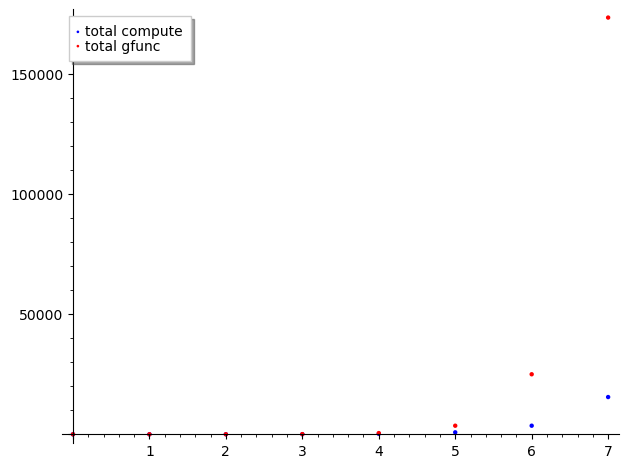

In [20]:
points = [(n, N(total_dyck_path_area(2*n, n))) for n in range(8)]  # Calculate points for average_dyck_path_area
points2 = [(n, B.coefficient(n)) for n in range(8)]  # Calculate points for asymp

# Plot the points
p1 = list_plot(points, color='blue', legend_label='total compute')
p2 = list_plot(points2, color='red', legend_label='total gfunc')
show(p1 + p2)

In [90]:
def f(s, n, p=1):
    return 1/((s-1)*n+1)* binomial(s*n,n)



In [94]:
def area(s, n):
    sum1 = 0
    for j in range(n+1): 
        sum1+= j*(n-j) *f(s+1,j) * f(s+1,n-j)
    sum2 = 0
    for j in range(n):
        inner = 0
        for i in range(j+1):
            inner+= i * (j-i) * f(s+1, i)*f(s+1,j-i) * binomial((s+1)*(n-j)-2, n-1-j) / (n-j)
        sum2+= inner
    

    return (s/2)*n * f(s+1, n) + binomial(s+1, 2) * (sum1 - sum2)

In [95]:
print(area(s=2, n=2))

9


In [96]:
t = []
for n in range(8):
    t.append(area(2,n))
print(t)

[0, 1, 9, 69, 502, 3564, 24960, 173325]


In [91]:
def area_series_coefs(s, n):
    L.<z> = LazyPowerSeriesRing(QQ)
    g = L.undefined()
    g.define(1+z*g^(s+1))
    S = L.undefined()
    S.define(s*z*(g.derivative())/2 + (binomial(s+1,2)/g)*(z* g.derivative())^2 ) 
    return [S.coefficient(i) for i in range(n)]

def average_series_coefs(s, n):
    L.<z> = LazyPowerSeriesRing(QQ)
    g = L.undefined()
    g.define(1+z*g^(s+1))
    S = L.undefined()
    S.define(s*z*(g.derivative())/2 + (binomial(s+1,2)/g)*(z* g.derivative())^2 ) 
    return [S.coefficient(i)/g.coefficient(i) for i in range(n)]

def bound_series_coefs(s, n):
    L.<z> = LazyPowerSeriesRing(QQ)
    g = L.undefined()
    g.define(1+z*g^(s+1))
    S = L.undefined()
    S.define(s*z*(g.derivative())/2 + (binomial(s+1,2)/g)*(z* g.derivative())^2 ) 
    return [(S.coefficient(i)/g.coefficient(i))/i^(1.5) for i in range(n)]

def area_series_coef(s,n):
    L.<z> = LazyPowerSeriesRing(QQ)
    g = L.undefined()
    g.define(1+z*g^(s+1))
    S = L.undefined()
    S.define(s*z*(g.derivative())/2 + (binomial(s+1,2)/g)*(z* g.derivative())^2 ) 
    return S.coefficient(n)

def fuss(s, n, p=1):
    return p*binomial(s*n+p, n) / (s*n+p)


def area_series(s):
    L.<z> = LazyPowerSeriesRing(QQ)
    g = L.undefined()
    g.define(1+z*g^(s+1))
    S = L.undefined()
    S.define(s*z*(g.derivative())/2 + (binomial(s+1,2)/g)*(z* g.derivative())^2 ) 
    return S


In [106]:
S = area_series(2)
for i in range(10):
    print(N(S.truncate(1000*i)(4/27)))

0.000000000000000
357.195365387832
724.728911211511


KeyboardInterrupt: 

In [99]:
print(area_series_coefs(4,10))
print([area(4,n) for n in range(10)])


[0, 2, 30, 400, 5140, 64940, 812822, 10114880, 125384200, 1550014270]
[0, 2, 30, 400, 5140, 64940, 812822, 10114880, 125384200, 1550014270]


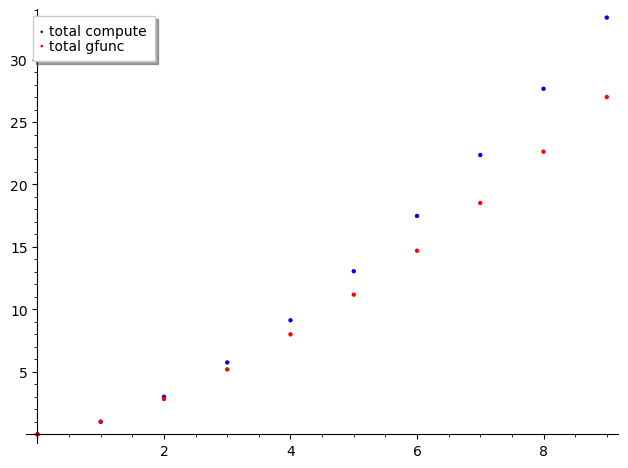

In [18]:
points = average_series_coefs(2,10)  # Calculate points for average_dyck_path_area
points2 = [(n, n^(1.5)) for n in range(10)]  # Calculate points for asymp

# Plot the points
p1 = list_plot(points, color='blue', legend_label='total compute')
p2 = list_plot(points2, color='red', legend_label='total gfunc')
show(p1 + p2)

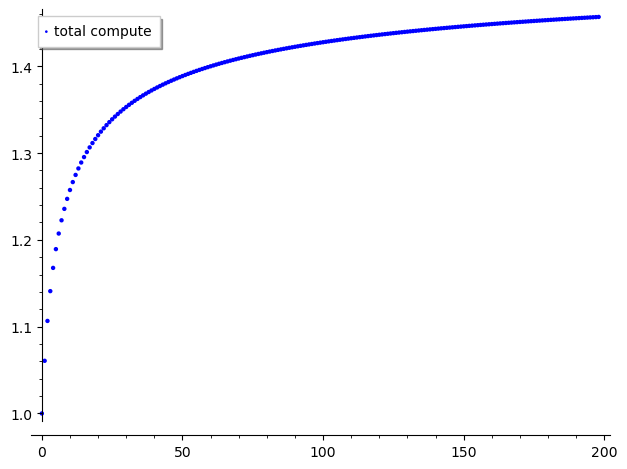

In [30]:
points = bound_series_coefs(2,200)  # Calculate points for average_dyck_path_area
zz = [x for x in points if x != 'NAN' and x > 0]
p1 = list_plot(zz, color='blue', legend_label='total compute')
show(p1)

In [31]:
bnd = bound_series_coefs(2,200)

verbose 0 (2236: graphics.py, get_minmax_data) ymin was NaN (setting to 0)
verbose 0 (2236: graphics.py, get_minmax_data) ymax was NaN (setting to 0)


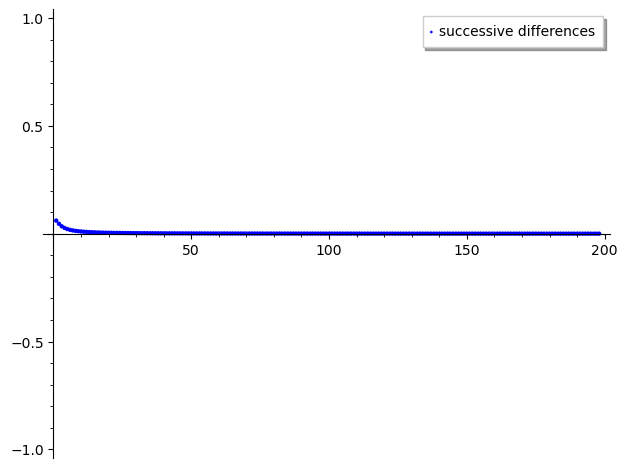

In [35]:
diff = [bnd[i + 1] - bnd[i] for i in range(len(bnd) - 1)]
p1 = list_plot(diff, color='blue', legend_label='successive differences')
show(p1)

In [42]:
# Define a negligible threshold
threshold = 0.0002

# Compute successive differences and find where they become negligible
for i in range(len(bnd) - 1):
    difference = abs(bnd[i + 1] - bnd[i])
    if difference <= threshold:
        print(f"The differences become negligible starting at index {i} between elements {bnd[i]} and {bnd[i+1]}")
        break
else:
    print("No negligible differences found within the given threshold.")

The differences become negligible starting at index 189 between elements 1.45484245479922 and 1.45504160585849


In [102]:
from tqdm import tqdm

def estimate_limit(threshold, s, T=1000):
    prev_ratio = 0
    # Use tqdm to create a progress bar for the loop
    for n in tqdm(range(1, T), desc="Calculating"):
        # Assuming area_series_coef and fuss are defined elsewhere
        # and the exponentiation operator should be **, not ^
        current_ratio = (area_series_coef(s, n) / fuss(s+1, n)) / n**1.5
        if abs(current_ratio - prev_ratio) < threshold:
            return current_ratio, n
        prev_ratio = current_ratio
    return None, None  # Return None if no convergence within the range


In [103]:
# Example usage:
threshold = 0.001  # Set your threshold here

limit_estimate, iteration = estimate_limit(threshold, s=2)
if limit_estimate is not None:
    print(f"Estimated limit: {limit_estimate} achieved at iteration {iteration}")
else:
    print("Limit did not stabilize within the given iterations.")

Calculating:   6%|██                                | 61/999 [00:00<00:06, 143.24it/s]

Estimated limit: 1.40089682362688 achieved at iteration 62


In [73]:
constants = []
threshold = 0.01  # Set your threshold here

for i in range(2,100):
    val, _ = estimate_limit(threshold, s=i)
    constants.append(val)



Calculating:   9%|███                                | 87/999 [00:01<00:16, 54.80it/s]


In [62]:
constants

[1.47122600110344, 2.10094962137886, 2.72682954214955]

In [ ]:
def asymp(n, a):
    expr = n^(3/2) * sqrt(2*pi*a*(a+1))/4
    return N(expr.subs({n: n, a: a}))

In [74]:
for i in range(2,100):
    expr =  sqrt(2*pi*i*(i+1))/4
    print(constants[i-2]/N(expr.subs({i:i})))

0.825108385849938
0.863447915906868
0.882508459068251
0.897844574769673
0.906638402405982
0.913355186218732
0.918700683468385
0.924671865053521
0.928225799110604
0.931270527903012
0.933919731660109
0.936254446507469
0.938334149507412
0.940203588688476
0.941897154062486
0.943441767319342
0.944858846769864
0.946165676818035
0.947376383421572
0.948502642488319
0.949554203325180
0.950539281514438
0.951464857987905
0.951737432979689
0.952586099914455
0.953389135608265
0.954150608264233
0.954874087199964
0.955562719574655
0.955730715335886
0.956375372797093
0.956991610411631
0.957581501258237
0.958146909838749
0.958266710624572
0.958801882063890
0.959316410915107
0.959811611094698
0.960288681175208
0.960377768699957
0.960832884034253
0.961272344045388
0.961348388290415
0.961769134951518
0.962176212590941
0.962570350861664
0.962632700953061
0.963011585524747
0.963379031969116
0.963735606890191
0.963787508359808
0.964131424553744
0.964465632489117
0.964511338335320
0.964834348538017
0.96514863

In [72]:
var('x, s, n')
a(x) = sqrt(x)/(s*(1-x)+1)

In [67]:
a.partial_fraction(x)


x |--> 2/s - 2/((s*x^2 + 1)*s)

In [66]:
b = sqrt(n*x - x^2)/((n*s + 2)*(s*x + 1))
assume(s>1)
assume(n>1)
integrate(a,x,0,1)

-2*(sqrt(s)*arctan(sqrt(s)) - s)/s^2

In [75]:

# assume((n^2*s^4+4*n*s^3+4*s^2)>0)
integrate(a(x),x, 0, 1)

I*pi*sqrt(s^2 + s)/s^2 - (sqrt(s^2 + s)*log(-2*s + 2*sqrt(s^2 + s) - 1) + 2*s)/s^2

In [12]:

integrate(a(x),x, n/2,n/2+1)"lim sup" denotes the limit superior. The root test states that the series converges if C < 1 and diverges if C > 1. It follows that the power series converges if the distance from z to the center a is less than 

1/2*((n^2 + 2*n)*s^2 + 2*(n + 2)*s - 2*(n*s + 1)*log(1/2*(n + 2)*s + 1) + 2*(n*s + 1)*log(1/2*(n - 2)*s + 1))/(n*s^4 + 2*s^3) - 1/2*n/s^2

In [40]:
assume?

Signature:      assume(*args)
Docstring:     
   Make the given assumptions.

   INPUT:

   * "*args" -- a variable-length sequence of assumptions, each
     consisting of:

     * any number of symbolic inequalities, like "0 < x, x < 1"

     * a subsequence of variable names, followed by some property that
       should be assumed for those variables; for example, "x, y, z,
       'integer'" would assume that each of "x", "y", and "z" are
       integer variables, and "x, 'odd'" would assume that "x" is odd
       (as opposed to even).

     The two types can be combined, but a symbolic inequality cannot
     appear in the middle of a list of variables.

   OUTPUT:

   If everything goes as planned, there is no output.

   If you assume something that is not one of the two forms above,
   then an "AttributeError" is raised as we try to call its "assume"
   method.

   If you make inconsistent assumptions (for example, that "x" is both
   even and odd), then a "ValueError" is raised.
